# Investor - Flow of Funds - US

### Introduction:

Special thanks to: https://github.com/rgrp for sharing the dataset.

### Step 1. Import the necessary libraries

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv). 

### Step 3. Assign it to a variable called 

In [32]:
flow = pd.read_csv('https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv')
flow.head()

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
0,2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
1,2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2,2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
3,2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
4,2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


### Step 4.  What is the frequency of the dataset?

In [33]:
#Subtraindo as duas primeiras entradas do dataset

int(flow.Date[1][8:]) - int(flow.Date[0][8:])

7

### Step 5. Set the column Date as the index.

In [34]:
flow.set_index('Date', inplace=True)

### Step 6. What is the type of the index?

In [35]:
#Object
flow.index.dtype

dtype('O')

### Step 7. Set the index to a DatetimeIndex type

In [36]:
flow.index = pd.DatetimeIndex(flow.index)

### Step 8.  Change the frequency to monthly, sum the values and assign it to monthly.

In [39]:
monthly = flow.resample('M').sum()
monthly.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-01-31,3661,-1627,5288,2730,12149,9414,2735,18540
2013-02-28,0,0,0,0,0,0,0,0
2013-03-31,0,0,0,0,0,0,0,0
2013-04-30,0,0,0,0,0,0,0,0


### Step 9. You will notice that it filled the dataFrame with months that don't have any data with NaN. Let's drop these rows.

In [50]:
#Não houve NaN data
monthly.isna().sum().sum() > 0

False

### Step 10. Good, now we have the monthly data. Now change the frequency to year.

In [51]:
yearly = monthly.resample('Y').sum()
yearly

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-12-31,3661,-1627,5288,2730,12149,9414,2735,18540
2014-12-31,330,-44689,45021,19570,59890,44994,14896,79787
2015-12-31,15049,-10459,25508,7280,26028,17986,8041,48357


### BONUS: Create your own question and answer it.

In [76]:
### Encontrar variação do total do fundo considerando cada mês dentro dos anos

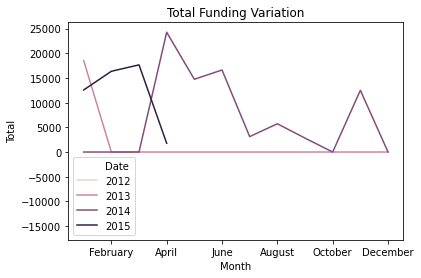

In [79]:
var = sns.lineplot(x=monthly.index.month, y=monthly.Total, hue=monthly.index.year)

plt.title('Total Funding Variation')
plt.xticks([2,4,6,8,10,12], ['February', 'April','June','August','October','December'])
plt.xlabel('Month')
plt.show()